---
title: "A statistical analysis of vowel inventories of world languages"
subtitle: "Multilingual NLP -- Lab 1"
author: "Philippos Triantafyllou"
date-modified: last-modified
date-format: long
lang: en
format: html
theme: cosmo
toc: true
number-sections: true
number-depth: 2
code-line-numbers: true
echo: true
output: true
cap-location: top
embed-resources: true
---

:::{.callout-note}
## Instructions

One of the aims of this practical session is to examine two well-known proposed linguistic 
universals relating to vowel systems. First, that virtually all languages possess the basic vowel triangle [i], [a], [u] (or close equivalents). Second, that if a language has highly marked vowels (for example nasal, long, or front rounded vowels), it almost always also has the corresponding simpler vowels. In this lab, we will test whether these are indeed universals by drawing on `PHOIBLE`, an open, cross-linguistic database of phonological inventories covering over 2,000 languages.

:::

In [1]:
#| echo: false
#| output: false

import os
my_path = 'vowel-inventories'
print(os.path.basename(os.getcwd()) == my_path)

True


## Getting started

First glance of the dataset. Each row is a single phoneme. Phonemes are organized in unique inventories that are labelled by the variable `InventoryID`. There seems to be 3020 unique phonetic inventories. We also have some variable that correspond the inventories to world languages.

In [2]:
#| echo: false

import pandas as pd

# Load data from csv file
data = pd.read_csv("data/phoible.csv", low_memory=False)
display(data)


,InventoryID,Glottocode,ISO6393,LanguageName,SpecificDialect,GlyphID,Phoneme,Allophones,Marginal,SegmentClass,...,advancedTongueRoot,periodicGlottalSource,epilaryngealSource,spreadGlottis,constrictedGlottis,fortis,lenis,raisedLarynxEjective,loweredLarynxImplosive,click
0,1,kore1280,kor,Korean,NaN,0068,h,ç h ɦ,NaN,consonant,...,-,-,-,+,-,-,-,-,-,-
1,1,kore1280,kor,Korean,NaN,006A,j,j,NaN,consonant,...,-,+,-,-,-,-,-,-,-,-
2,1,kore1280,kor,Korean,NaN,006B,k,k̚ ɡ k,NaN,consonant,...,-,-,-,-,-,-,-,-,-,-
3,1,kore1280,kor,Korean,NaN,006B+02B0,kʰ,kʰ,NaN,consonant,...,-,-,-,+,-,-,-,-,-,-
4,1,kore1280,kor,Korean,NaN,006B+02C0,kˀ,kˀ,NaN,consonant,...,-,-,-,-,+,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105479,3020,lamu1254,lby,Tableland Lamalama,NaN,0294,ʔ,NaN,False,consonant,...,-,-,-,-,+,-,-,-,-,-
105480,3020,lamu1254,lby,Tableland Lamalama,NaN,03B8,θ,NaN,False,consonant,...,-,-,-,-,-,-,-,-,-,-
105481,3020,lamu1254,lby,Tableland Lamalama,NaN,0061,a,NaN,False,vowel,...,-,+,-,-,-,0,0,-,-,0
105482,3020,lamu1254,lby,Tableland Lamalama,NaN,0069,i,NaN,False,vowel,...,-,+,-,-,-,0,0,-,-,0


We can have a quick look at the summary statistics of the first 10 columns (variables) that are of interest (ignoring some nonsensical information for the `InventoryID` variable for example).

In [3]:
#| label: tbl-dataset
#| tbl-cap: "Summary statistics of first 10 columns"

data.iloc[:, :10].describe(include='all')

,InventoryID,Glottocode,ISO6393,LanguageName,SpecificDialect,GlyphID,Phoneme,Allophones,Marginal,SegmentClass
count,105484.000000,105465,105459,105484,21985,105484,105484,51904,84610,105484
unique,NaN,2176,2094,2716,544,3142,3142,6891,2,3
top,NaN,kham1282,mis,Iron Ossetic,W2,006D,m,m,False,consonant
freq,NaN,622,828,444,120,2915,2915,1091,83263,72282
mean,1479.331083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,843.110759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,769.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1464.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2237.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Immediately we can see some interesting things:

- the most frequent value for `Glottocode` is `kham1282` with 622 rows;
- the most frequent value for `LanguageName` is `Iron Ossetic` with 444 rows;
- `ISO6393` has 828 values that are labelled `mis`, and we assume that they are missing values;
- amongst all the columns that correspond to language classification, there are discrepancies between their counts.

### Q1: determining the number of unique languages

:::{.callout-tip}
## FYI

In this question, we spend most of the time trying to solve the problem of multiple inventories per language. As our goal is to compute statistics over the inventories of world languages, we must make sure that each language "contributes fairly" by making sure we take it into account only once. As we will see, some languages have more than one phonetic inventory so we need to deal with this before moving further.
:::

We want to determine the number of unique languages in our dataset. Arguably, this is an important variable in our analysis so we can spend some time digging into the dataset.

A first variable that grabs our attention is `InventoryID`. When we look at the `PHOIBLE` documentation, we can see:

> For the most part, every phonological inventory in PHOIBLE is based on one-and-only-one language description (usually a research article, book chapter, dissertation, or descriptive grammar).

This seems like a coherent start to base our analysis. Each Inventory ID has a unique description of a  a phonetic inventory. But we also have other variables: `LanguageName`, `Glottocode` and `ISO6393`. Contrary to `InventoryID`, they seem to hold the "language name".

Looking at the summary statistics in the table above, we realize that the counts of these variables are not the same, that means that some values in one variable might map to multiple values in another variable and so on.

Naively, if we start form `InventoryID` and  `LanguageName`, what can we find?

We group by `LanguageName` and verify if they all (in theory they should) all have one phonological inventory.

In [4]:
subset = data.groupby("LanguageName")["InventoryID"].nunique().reset_index()
subset = subset[subset["InventoryID"] > 1]
print("Are there languages with more than one inventory?", len(subset) == 0)

Are there languages with more than one inventory? False


It seems that some languages have more than one inventory. How many languages? How many inventories do they have on average?

In [5]:
print("Number of languages with more than one phonetic inventory:", len(subset))
statistics = subset.describe().round(2).reset_index()

Number of languages with more than one phonetic inventory: 208


In [6]:
#| echo: false
#| label: tbl-inventory
#| tbl-cap: "Descriptive statistics for languages with multiple inventories"

from IPython.display import Markdown
statistics.columns = ["Measure", "Value"]
Markdown(statistics.to_markdown(index=False))

| Measure   |   Value |
|:----------|--------:|
| count     |  208    |
| mean      |    2.46 |
| std       |    1.01 |
| min       |    2    |
| 25%       |    2    |
| 50%       |    2    |
| 75%       |    3    |
| max       |   10    |

There are 208 languages (from the 2716 unique values in `LanguageName`) that have more than one inventory, and most of them only have one additional one. We can explain this based on the documentation description given above: presumably, different linguists have compiled slightly different inventories for the same language/dialect. There are some outliers, as there is a language with 10 inventories.

In [7]:
print(subset[subset["InventoryID"] == 10]['LanguageName'].values[0])

Iron Ossetic


Going back to the summary statistics table, there seems to be another language that has a lot of rows, this time it is the most frequent value of the `Glottocode` variable.

In [8]:
data.loc[data['Glottocode'] == 'kham1282']['InventoryID'].value_counts()

InventoryID
2519    133
2489     96
2591     78
2525     77
2587     64
2327     62
2328     61
2600     51
Name: count, dtype: int64

We can correspond this to its value(s) in the `LanguageName` variable.

In [9]:
data.loc[data['Glottocode'] == 'kham1282']['LanguageName'].unique().tolist()

['Rgyalthang Tibetan',
 'Brag-g.yab Tibetan',
 'Nangchenpa Tibetan',
 'Soghpo Tibetan',
 'Kami Tibetan',
 'Sangdam Tibetan',
 'Dongwang Tibetan',
 'Kham Tibetan']

Doing the same with `ISO6393`, we get:

In [10]:
data.loc[data['Glottocode'] == 'kham1282']['ISO6393'].unique().tolist()

['khg']

So it seems that `LanguageName` has more distinctions between "languages" and corresponds to the language name given by the linguist to the corresponding phonetic inventory.

There are are also discrepancies between the different classifications. For example concerning `LanguageName` and `Glottocode` the documentation says:

> Every phonological inventory in PHOIBLE has a unique numeric inventory ID. Since most PHOIBLE inventories (aside from some UPSID or SPA ones, as mentioned above) are based on a single document, it is fairly straightforward to link each PHOIBLE inventory to the Glottolog, which provides links between linguistic description documents and unique identifiers for dialects, languages, and groupings of dialects and languages at various levels.

Furthermore, the documentation notes differences between `Glottocode` and `LanguageName` (for example, some languages with a glottocode do not have ISO IDs, and there might be some shared ISO IDs between different glottocode IDs).

We can visualise these differences by creating a table grouping languages by the ISO norm. We can see for each ISO label, the corresponding `Glottocode` labels (if more than one), the language names given by `LanguageName` as well as the number of inventories. We only show the languages that have more than 5 different inventories.

In [11]:
result = (
    data
    .groupby("ISO6393", as_index=False)
    .agg(
        Inventories=("InventoryID", "nunique"),
        Glottocode=("Glottocode", lambda x: ", ".join(pd.unique(x.dropna()))),
        Names=("LanguageName", lambda x: ", ".join(pd.unique(x.dropna())))
    )
    .query("Inventories >= 5")
    .sort_values("Inventories", ascending=False)
)

In [12]:
#| echo: false
#| label: tbl-discrepancies
#| tbl-cap: "Discrepancies between different language classifications"

Markdown(result.to_markdown(index=False))

| ISO6393   |   Inventories | Glottocode                                                                                                                                                                                                                                                                   | Names                                                                                                                                                                                                                                                                                                                                                  |
|:----------|--------------:|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| mis       |            30 | pisa1245, lizu1234, east2773, zhon1235, vach1239, fore1274, mink1237, guwa1244, mith1236, cola1237, yari1243, west2443, djad1246, kera1256, lowe1402, ngin1247, gudj1237, kawa1290, wala1263, tyan1235, luth1234, mbiy1238, ngko1236, yadh1237, bula1255, yulp1239, sout2770 | Pisamira, Lizu, Dolakha Newar, Zhongu Tibetan, Eastern Khanty, Forest Nenets, Minkin, Guwar, Djindewal, Mithaka, Kolakngat, Yari-Yari, East Djadjawurung, Jardwadjali, Keramin, Ngayawang, Ngintait, Gudjal, Ogh Awarrangg, Ogh Unyjan, Walangama, Thaynakwithi, Luthigh, Mbiywom, Ngkoth, Yadhaykenu, Bularnu, Yulparija, West Djadjawurung, Ngunawal |
| oss       |            12 | osse1243, digo1242                                                                                                                                                                                                                                                           | Ossetian, Iron Ossetic, Digor Ossetic                                                                                                                                                                                                                                                                                                                  |
| bzr       |            10 | biri1256                                                                                                                                                                                                                                                                     | Barna, Biri, Garingbal, Miyan, Wiri, Yambina, Yangga, Yilba, Yuwi, Wangan                                                                                                                                                                                                                                                                              |
| eng       |             9 | stan1293                                                                                                                                                                                                                                                                     | English, English (American), American English, English (Australian), English (British), English (New Zealand)                                                                                                                                                                                                                                          |
| khg       |             8 | kham1282                                                                                                                                                                                                                                                                     | Rgyalthang Tibetan, Brag-g.yab Tibetan, Nangchenpa Tibetan, Soghpo Tibetan, Kami Tibetan, Sangdam Tibetan, Dongwang Tibetan, Kham Tibetan                                                                                                                                                                                                              |
| nld       |             8 | dutc1256                                                                                                                                                                                                                                                                     | Dutch                                                                                                                                                                                                                                                                                                                                                  |
| eus       |             8 | basq1248, basq1250                                                                                                                                                                                                                                                           | Basque, BASQUE, Zuberoan Basque                                                                                                                                                                                                                                                                                                                        |
| mhr       |             7 | east2328                                                                                                                                                                                                                                                                     | Cheremis, MARI, Meadow Mari, Eastern Mari                                                                                                                                                                                                                                                                                                              |
| gup       |             7 | gunw1252, gund1246, gune1238, mura1269, guma1252, naia1238                                                                                                                                                                                                                   | Gunwinggu, Gun-Dedjnjenghmi, Gun-Djeihmi, Kune, Kuninjku, Kunwinjku, Mayali                                                                                                                                                                                                                                                                            |
| kca       |             6 | khan1273                                                                                                                                                                                                                                                                     | Ostyak, KHANTY, Eastern Khanty, Northern Khanty                                                                                                                                                                                                                                                                                                        |
| gwn       |             6 | gwan1268                                                                                                                                                                                                                                                                     | Gwandara (Karshi), Gwandara (Cancara), Gwandara (Toni), Gwandara (Gitata), Gwandara (Koro), Gwandara (Nimbia)                                                                                                                                                                                                                                          |
| nyf       |             6 | giry1241, kamb1298, kaum1238                                                                                                                                                                                                                                                 | Giryama, Jiβana, Kambe, Kauma, Raβai, Reβe                                                                                                                                                                                                                                                                                                             |
| nys       |             6 | nyun1247, kani1276                                                                                                                                                                                                                                                           | Balardung, Kaniyang, Minang, Wiilman, Wudjari, Yuwat                                                                                                                                                                                                                                                                                                   |
| sgw       |             6 | seba1251, ezha1238, chah1248, gume1239                                                                                                                                                                                                                                       | Muher, Ezha, Chaha, Gumer, Gura, Gyeto                                                                                                                                                                                                                                                                                                                 |
| lzz       |             6 | lazz1240                                                                                                                                                                                                                                                                     | Laz                                                                                                                                                                                                                                                                                                                                                    |
| lit       |             6 | lith1251                                                                                                                                                                                                                                                                     | Lithuanian, LITHUANIAN                                                                                                                                                                                                                                                                                                                                 |
| spa       |             5 | stan1288                                                                                                                                                                                                                                                                     | Spanish, SPANISH                                                                                                                                                                                                                                                                                                                                       |
| tts       |             5 | nort2741                                                                                                                                                                                                                                                                     | Northeastern Thai                                                                                                                                                                                                                                                                                                                                      |
| udm       |             5 | udmu1245, bese1243                                                                                                                                                                                                                                                           | Udmurt, Beserman                                                                                                                                                                                                                                                                                                                                       |
| unr       |             5 | mund1320                                                                                                                                                                                                                                                                     | Mundari, MUNDARI, Bhumij                                                                                                                                                                                                                                                                                                                               |
| xtc       |             5 | katc1250, katc1249                                                                                                                                                                                                                                                           | Katcha, KADUGLI, Kadugli (Kadugli), Kadugli (Miri), Kadugli (Katcha)                                                                                                                                                                                                                                                                                   |
| ben       |             5 | beng1280                                                                                                                                                                                                                                                                     | Bengali, BENGALI                                                                                                                                                                                                                                                                                                                                       |
| khr       |             5 | khar1287                                                                                                                                                                                                                                                                     | Kharia, KHARIA                                                                                                                                                                                                                                                                                                                                         |
| bod       |             5 | tibe1272                                                                                                                                                                                                                                                                     | Tibetan, Lhasa Tibetan, Drokpa Tibetan, Dingri Tibetan, Shigatse Tibetan                                                                                                                                                                                                                                                                               |
| kbd       |             5 | kaba1278                                                                                                                                                                                                                                                                     | Kabardian, KABARDIAN                                                                                                                                                                                                                                                                                                                                   |
| hin       |             5 | hind1269                                                                                                                                                                                                                                                                     | Hindi-Urdu, HINDI-URDU, Hindi                                                                                                                                                                                                                                                                                                                          |
| hau       |             5 | haus1257                                                                                                                                                                                                                                                                     | Hausa, HAUSA                                                                                                                                                                                                                                                                                                                                           |
| gnl       |             5 | gang1268                                                                                                                                                                                                                                                                     | Barada, Gabalbara, Gangulu, Ganulu, Yetimarala                                                                                                                                                                                                                                                                                                         |
| gle       |             5 | iris1253                                                                                                                                                                                                                                                                     | Irish Gaelic, IRISH, Irish                                                                                                                                                                                                                                                                                                                             |
| ell       |             5 | mode1248                                                                                                                                                                                                                                                                     | Modern Greek, GREEK, Greek                                                                                                                                                                                                                                                                                                                             |
| che       |             5 | chec1245                                                                                                                                                                                                                                                                     | Chechen                                                                                                                                                                                                                                                                                                                                                |
| car       |             5 | gali1262                                                                                                                                                                                                                                                                     | Carib, CARIB                                                                                                                                                                                                                                                                                                                                           |
| bym       |             5 | bidy1243                                                                                                                                                                                                                                                                     | Bidyara, Dharawala, Wadjabangay, Yandjibara, Yiningay                                                                                                                                                                                                                                                                                                  |
| bsk       |             5 | buru1296                                                                                                                                                                                                                                                                     | Burushaski, BURUSHASKI                                                                                                                                                                                                                                                                                                                                 |
| yrk       |             5 | nene1249                                                                                                                                                                                                                                                                     | Yurak, NENETS, Tundra Nenets                                                                                                                                                                                                                                                                                                                           |

Finally, let's look at how many `ISO6393` labels map to more than one `Glottocode` labels (excluding the `mis` label).

In [13]:
subset = (data.loc[data["ISO6393"] != "mis"].groupby("ISO6393")["Glottocode"].nunique().gt(1).sum())
subset2 = (data.loc[data["ISO6393"] != "mis"].groupby("ISO6393")["Glottocode"].nunique().gt(2).sum())

In [14]:
#| echo: false

print("Number of ISO languages having more than one Glottocode label (excluding 'mis'):", subset)
print("Number of ISO languages having more than two Glottocode label (excluding 'mis'):", subset2)

Number of ISO languages having more than one Glottocode label (excluding 'mis'): 40
Number of ISO languages having more than two Glottocode label (excluding 'mis'): 9


So to recap:

- since we are working with phonetic inventories, we need to keep the `InventoryID` coherent;
- a non-negligible portion of languages, especially rare languages, have more than one inventory ID;
- the number of languages varies greatly based on which classification we take;
- the two candidate variables for language name are  `ISO6393` and ` Glottocode`;
- the mismatching is minimal between the two;
- ISO has some languages classified as "missing".

We could just take the glottocode as the main language variable, but that leaves us still with the problem of multiple phonetic inventories, and that would bias our statistics, because some languages will count for at least twice. We will follow the recommendations of the dataset creators found [here](https://phoible.org/faq), that is, we wil sample one inventory per glottocode label.

> If multiple inventories per isocode/glottocode are problematic for your analysis or research question, one approach is to select one inventory from each isocode/glottocode via random sampling.

In [71]:
sample = (
    data[["InventoryID", "Glottocode"]]
    .drop_duplicates()
    .groupby("Glottocode", group_keys=False)
    .apply(lambda g: g.sample(1, random_state=42), include_groups=False)
)

sampled_data = data[data["InventoryID"].isin(sample["InventoryID"])].drop(columns=["ISO6393", "LanguageName"]).reset_index()

In [72]:
#| echo: false
#| label: tbl-sampled
#| tbl-cap: "Sampled dataset"

display(sampled_data)

,index,InventoryID,Glottocode,SpecificDialect,GlyphID,Phoneme,Allophones,Marginal,SegmentClass,Source,...,advancedTongueRoot,periodicGlottalSource,epilaryngealSource,spreadGlottis,constrictedGlottis,fortis,lenis,raisedLarynxEjective,loweredLarynxImplosive,click
0,40,2,kett1243,NaN,0062,b,pʲ β p b,NaN,consonant,spa,...,-,+,-,-,-,-,-,-,-,-
1,41,2,kett1243,NaN,0064,d,d d r,NaN,consonant,spa,...,-,+,-,-,-,-,-,-,-,-
2,42,2,kett1243,NaN,0064+02B2,dʲ,dʲ,NaN,consonant,spa,...,-,+,-,-,-,-,-,-,-,-
3,43,2,kett1243,NaN,0068,h,h,NaN,consonant,spa,...,-,-,-,+,-,-,-,-,-,-
4,44,2,kett1243,NaN,006B+031F,k̟,ɡ k ɡ̟ k̟,NaN,consonant,spa,...,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74881,105479,3020,lamu1254,NaN,0294,ʔ,NaN,False,consonant,er,...,-,-,-,-,+,-,-,-,-,-
74882,105480,3020,lamu1254,NaN,03B8,θ,NaN,False,consonant,er,...,-,-,-,-,-,-,-,-,-,-
74883,105481,3020,lamu1254,NaN,0061,a,NaN,False,vowel,er,...,-,+,-,-,-,0,0,-,-,0
74884,105482,3020,lamu1254,NaN,0069,i,NaN,False,vowel,er,...,-,+,-,-,-,0,0,-,-,0


We can now reliably use the `Glottocode` variable to give us coherent, unique phonetic inventories for each language. Now to finally answer the original question. There are 2176 unique languages in our dataset. Looking at the average number of vowels per language, we are interested in the `SegmentClass` variable.

In [73]:
print(round(sampled_data[sampled_data['SegmentClass'] == 'vowel'].groupby('Glottocode')['Phoneme'].nunique().mean(), 2))

10.08


On average, there are 10.08 vowels per language.

In order to appreciate the distribution of the vowel inventory sizes, we also plot the distribution of the consonants.

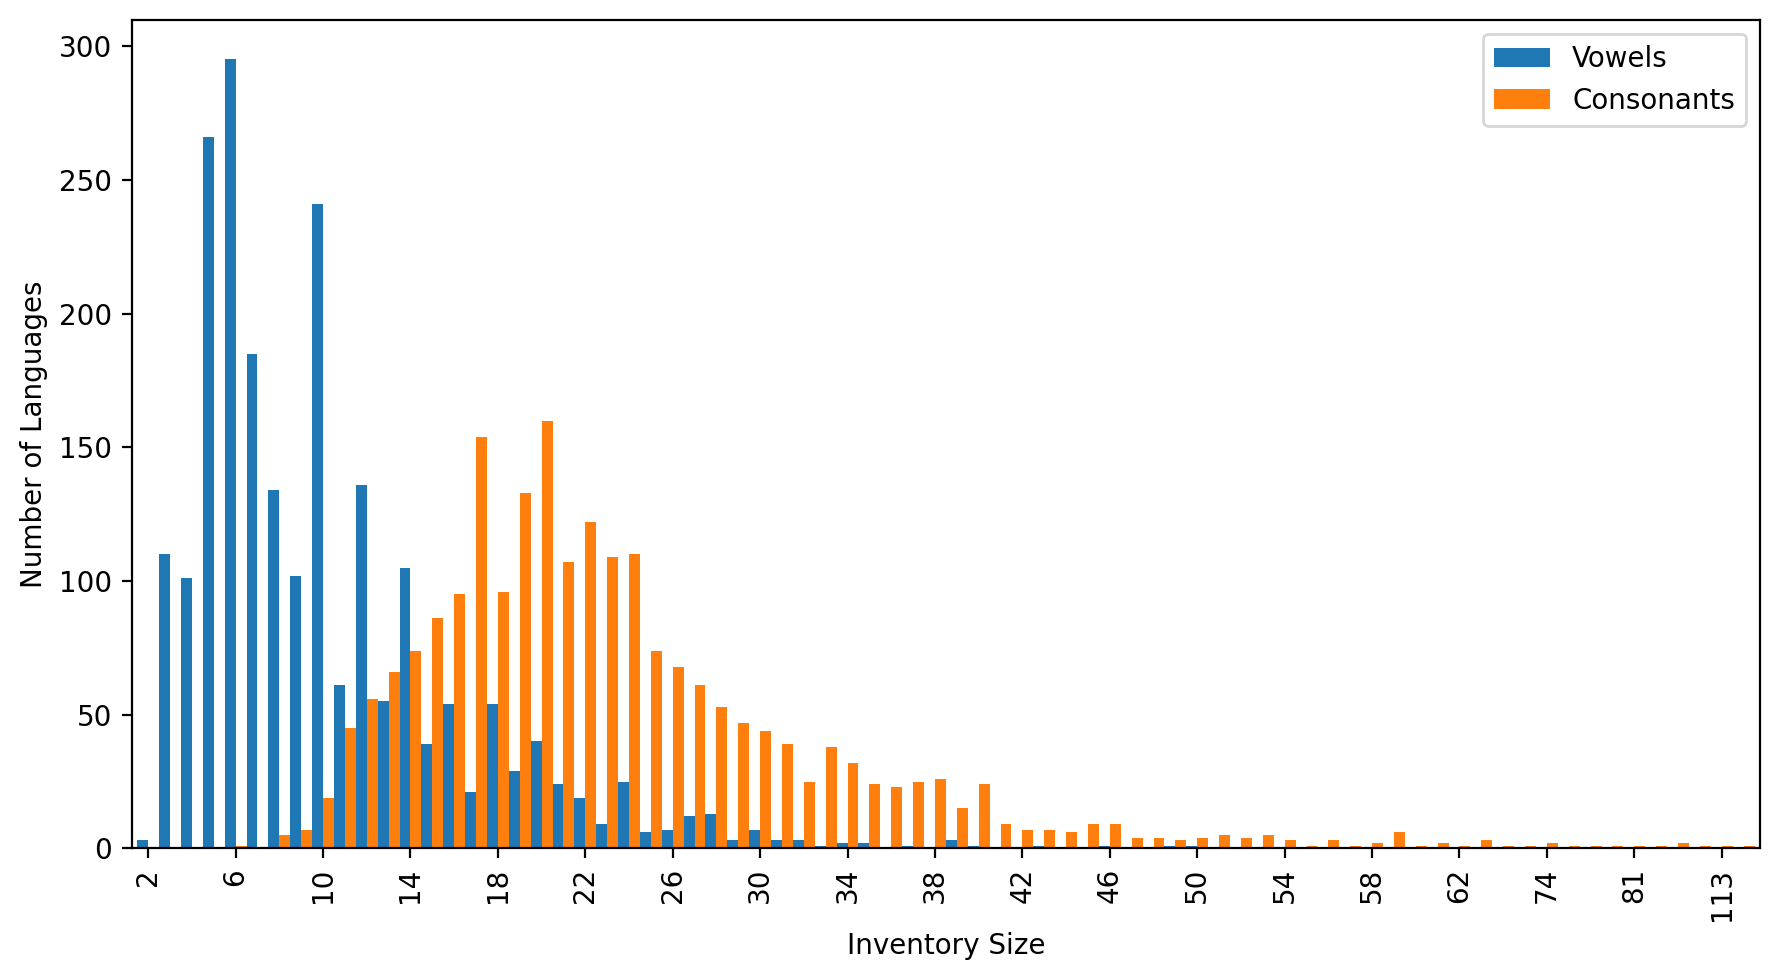

In [74]:
#| echo: false
#| label: fig-vowel-distribution
#| fig-cap: "Distribution of vowel/consonant inventory sizes across languages"

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
plt.rcParams["figure.dpi"] = 200

# Compute vowel inventory sizes per Glottocode
vowel_inventories = (
    sampled_data[sampled_data["SegmentClass"] == "vowel"]
    .groupby("Glottocode")["Phoneme"]
    .nunique()
)

# Compute consonant inventory sizes per Glottocode
consonant_inventories = (
    sampled_data[sampled_data["SegmentClass"] == "consonant"]
    .groupby("Glottocode")["Phoneme"]
    .nunique()
)

# Prepare frequency distributions
vowel_dist = vowel_inventories.value_counts().sort_index()
consonant_dist = consonant_inventories.value_counts().sort_index()

# Align both distributions on the same x-axis (fill missing sizes with 0)
combined = (
    pd.DataFrame({
        "Vowels": vowel_dist,
        "Consonants": consonant_dist
    })
    .fillna(0)
    .astype(int)
)

# Plot side-by-side bars
ax = combined.plot(
    kind="bar",
    figsize=(9, 5),
    width=1,
    xlabel="Inventory Size",
    ylabel="Number of Languages"
)

# Show every 5th x-axis tick
ax.xaxis.set_major_locator(MultipleLocator(4))

plt.tight_layout()
plt.show()

 We can also compute descriptive statistics for the vowel inventory sizes.

In [75]:
#| echo: false
#| label: tbl-stat-desc-mean-vowels
#| tbl-cap: "Descriptive statistics for vowel inventory sizes"

stats = vowel_inventories.describe().round(2).reset_index()
stats.columns = ["Measure", "Value"]
Markdown(stats.to_markdown(index=False))

| Measure   |   Value |
|:----------|--------:|
| count     | 2176    |
| mean      |   10.08 |
| std       |    6.12 |
| min       |    2    |
| 25%       |    6    |
| 50%       |    8    |
| 75%       |   12    |
| max       |   50    |

### Q2: what's interesting?

First, we notice a very subtle bi-modal distribution for the vowel inventories as well as the fact that it is positively skewed (the mean is higher than the median), whereas the consonant inventory sizes distribution is less dense, the sizes are on average much larger, fact that is unsurprising considering humans have more articulations for consonants.

Second, We can see from the maximal value form the descriptive statistics table that the upper bound of vowels in the human language is quite high compared to the mean. That indicates that there is an under-utilisation of the articulatory capacities of vowels.

Third, we notice that this "upper bound" is actually utilized by very few languages. As a matter of fact, there seems to be many outliers in the upper bound of our vowel distribution. This is also the case for the consonants.

### Q3: identifying outliers with the interquartile range (IQR) method

We can write a quick function that takes our `vowel_inventories` series and returns a new series with outliers.

In [76]:
def find_iqr(vowel_size: pd.Series):
    q1 = vowel_size.quantile(0.25)
    q3 = vowel_size.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    mask = ~vowel_size.between(lower, upper)
    return vowel_size[mask]

We get 121 outliers.

In [77]:
#| echo: false
#| label: tbl-iqr-outliers
#| tbl-cap: "List of outliers using IQR"

df = vowel_inventories.sort_values(ascending=False)
df = find_iqr(df).reset_index()
display(df)

,Glottocode,Phoneme
0,elfd1234,50
1,scot1245,49
2,juho1239,46
3,para1301,43
4,reel1238,40
...,...,...
116,adan1251,22
117,dhim1246,22
118,doya1240,22
119,teng1272,22


We can now plot the distributions again, this time removing the outliers.

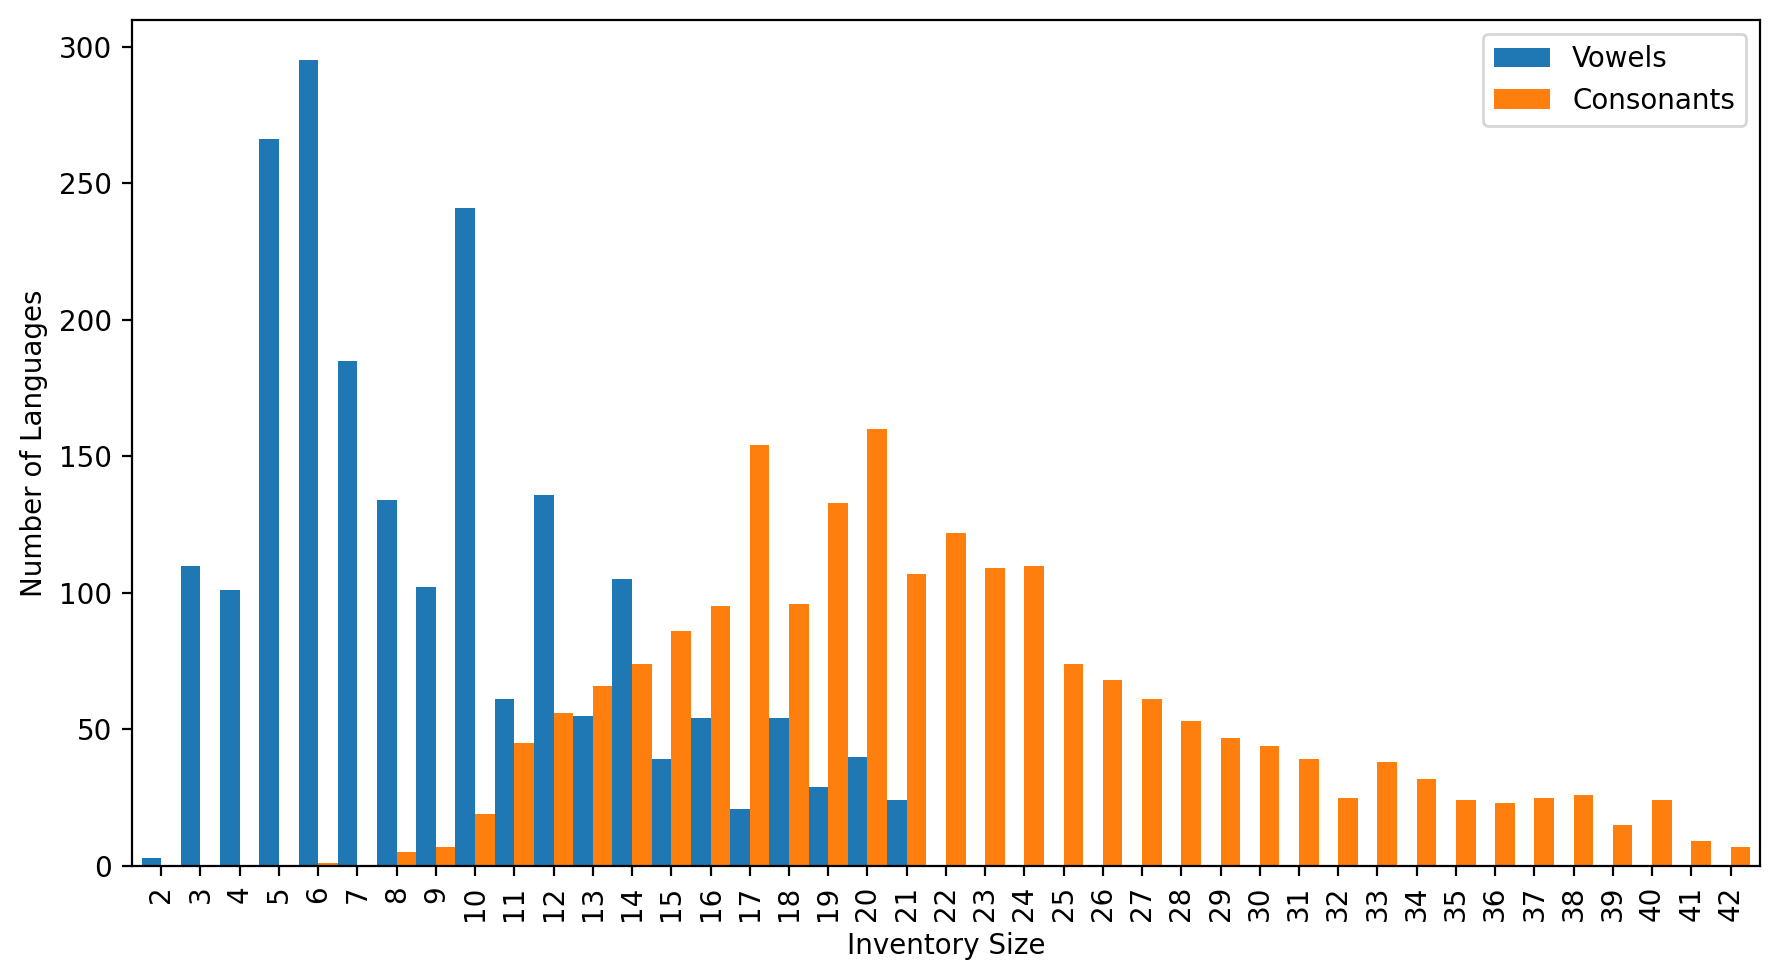

In [78]:
#| echo: false
#| label: fig-vowel-distribution-2
#| fig-cap: "Distribution of vowel/consonant inventory sizes across languages (without outliers)"

# Compute vowel inventory sizes per Glottocode
vowel_inventories = (
    sampled_data[sampled_data["SegmentClass"] == "vowel"]
    .groupby("Glottocode")["Phoneme"]
    .nunique()
)

# Compute consonant inventory sizes per Glottocode
consonant_inventories = (
    sampled_data[sampled_data["SegmentClass"] == "consonant"]
    .groupby("Glottocode")["Phoneme"]
    .nunique()
)

# Remove outliers
vowel_outliers = find_iqr(vowel_inventories.sort_values(ascending=False))
consonant_outliers = find_iqr(consonant_inventories.sort_values(ascending=False))
filtered_vowel_inventories = vowel_inventories.drop(index=vowel_outliers.index)
filtered_consonant_inventories = consonant_inventories.drop(consonant_outliers.index)

# Prepare frequency distributions
vowel_dist = filtered_vowel_inventories.value_counts().sort_index()
consonant_dist = filtered_consonant_inventories.value_counts().sort_index()

# Align both distributions on the same x-axis (fill missing sizes with 0)
combined = (
    pd.DataFrame({
        "Vowels": vowel_dist,
        "Consonants": consonant_dist
    })
    .fillna(0)
    .astype(int)
)

# Plot side-by-side bars
combined.plot(
    kind="bar",
    figsize=(9, 5),
    width=1,
    xlabel="Inventory Size",
    ylabel="Number of Languages"
)

plt.tight_layout()
plt.show()

We can compute the statistics again.

In [79]:
#| echo: false
#| label: tbl-stat-desc-mean-vowels-no-outliers
#| tbl-cap: "Descriptive statistics for vowel inventory sizes (without outliers)"

stats = filtered_vowel_inventories.describe().round(2).reset_index()
stats.columns = ["Measure", "Value"]
Markdown(stats.to_markdown(index=False))

| Measure   |   Value |
|:----------|--------:|
| count     | 2055    |
| mean      |    9.08 |
| std       |    4.44 |
| min       |    2    |
| 25%       |    6    |
| 50%       |    8    |
| 75%       |   12    |
| max       |   21    |

Even when removing outliers, we can see that the positive skew remains. We can conclude that most languages use a small set of vowels in their phonological systems. This leads to the following questions?

- What are these vowels?
- Are they on average the same between languages?
- Can we identify the basic vowel triangle for all of them?

## Testing linguistic universals

:::{.callout-note}
## Instructions

The basic idea of this part is to use the data to test whether the proposed universals are actually observed across the sample of languages in the `PHOIBLE` database.

Mutual information formula:

$$
I(A, B) = \sum_{a \in \{0,1\}} \sum_{b \in \{0,1\}} 
p(a,b) \log \frac{p(a,b)}{p(a)\,p(b)}
$$

Where $p(a,b)$ is the proportion of languages with the configuration $(a,b)$, and $p(a)$ and
$p(b)$ are the marginal probabilities of each phoneme.
:::

### Q4: identify the three most frequent vowels

We create a subset of our data with only the vowels.

In [84]:
vowels = sampled_data[sampled_data['SegmentClass'] == 'vowel'].reset_index()

In order to answer this question, we must first convene what we consider as the *same* vowel. The simple approach would consist following the composition of the inventories and considering each phoneme individually. After discussing the lab with a colleague, they remarked that considering (or not) phonemes with diacritics as distinct vowels would considerably change the frequencies. Arguably, we can say that a language has the sound [a] if it possesses the phoneme [aː].

For example, lets see how many distinct phonemes there exist within our data, that are composed in part by the sound [a]. In order to do this, we will use the `GlyphID` variable and select all values that contain the Unicode for [a], that is `U0061`.

In [85]:
subset = vowels[vowels["GlyphID"].astype(str).str.contains("0061", na=False)]["Phoneme"].unique()

In [86]:
#| echo: false

print(subset)

['a' 'aː' 'ã' 'ãː' 'a̟' 'a̟̙ː' 'a̟ː' 'ã̟' 'ã̟ː' 'ai' 'au' 'aˤ' 'a̤'
 'a˞' 'aɯ' 'a̰' 'aɨ' 'ă' 'ḁ' 'ae̞' 'a̟i' 'ã̟ĩ' 'ia' 'ua' 'ɨa' 'ae̞ˤ'
 'ao̞' 'ao̞ˤ' 'aˤː' 'ãẽ̞ˤ' 'ãõ̞ˤ' 'ãˤ' 'ãˤː' 'o̞a' 'o̞aˤ' 'õ̞ã'
 'õ̞ãˤ' 'ã̰' 'ɯa' 'a̤i̤' 'a̤ṳ' 'a̤ɯ̤' 'i̤a̤' 'ṳa̤' 'a̠' 'a̠ː' 'iaː'
 'uaː' 'ao' 'i̯a' 'ay' 'ae' 'ea' 'iã' 'ɪa' 'ɪã' 'ʊa' 'iau' 'uai' 'aɪ'
 'aʊ' 'aˀ' 'oa' 'aɛ' 'ãi' 'a̙' 'a̙ː' 'a̙ˠ' 'aɔ' 'a̰ḭ' 'a̰ṵ' 'a̤ː' 'a̤ˑ'
 'a̰ː' 'a̰ˑ' 'uːa' 'aˑ' 'aᴱ' 'å' 'i̯ãː' 'uã' 'uãː' 'au̯' 'ai̯' 'ä'
 'aʲ' 'aʲː' 'au̜' 'aʊɪ' 'ya' 'əɪa' 'äː' 'ɔaː' 'ae̯' 'o̞ä' 'uä' 'äi̯'
 'äu̯' 'u̯a' 'ãĩ' 'ãũ' 'ã̈' 'ɔa' 'ɛa' 'ä̠' 'aːu' 'ɪ̯ä' 'ã̈ː'
 'ã̤̈ː' 'ä̤' 'ai̯ː' 'auː' 'ãɪ̯ː' 'i̯au̯' 'a˞ː' 'a˞ˤ' 'aɪ̃' 'aɯ̃' 'a̰ɪ̰'
 'a̰ɯ̰' 'oä' 'aːi̯' 'ãɛ̃' 'aɵ̯' 'ua̟' 'ɛa̟' 'u̯ã' 'ĩã' 'aːu̯' 'ũã'
 'aːi' 'ã̤']


As we can see, there are *a lot* of cases, and there is a lot of phonetic variation, in many cases involving combination with different vowels. Nevertheless, can we consider that a language with the phoneme [əɪa] (and not the phoneme [a]), should be excluded from the languages with the basic vowel triangle? Our intuitive answer is no, but this would require a thorough phonological investigation, that is beyond the scope of this work.

We can nonetheless try to find such cases, where a language has an inventory excluding the base vowel [a], but has other(s) that combine this sound with others.

In [110]:
pattern = r"(^|\+)0061(\+|$)"

test = (
    vowels.assign(
        has_plain = (vowels["GlyphID"].eq("0061")),
        has_variant = (vowels["GlyphID"].str.match(pattern, na=False) & ~vowels["GlyphID"].eq("0061"))
    )
)

test = (
    test
    .groupby("InventoryID", as_index=False)[["has_plain", "has_variant"]]
    .any().query("has_variant and not has_plain")
)

print(test["InventoryID"].tolist())

[14, 49, 57, 93, 141, 150, 155, 157, 166, 187, 193, 198, 304, 307, 331, 336, 354, 358, 390, 391, 409, 413, 427, 489, 502, 510, 516, 540, 545, 566, 568, 576, 585, 861, 965, 997, 1041, 1142, 1309, 1326, 1414, 1554, 1716, 1733, 1767, 1796, 2169, 2221, 2245, 2250, 2252, 2253, 2256, 2260, 2266, 2270, 2278, 2285, 2291, 2304, 2315, 2325, 2331, 2336, 2337, 2348, 2358, 2363, 2365, 2375, 2381, 2384, 2386, 2392, 2394, 2397, 2404, 2412, 2447, 2452, 2453, 2464, 2466, 2473, 2474, 2485, 2491, 2493, 2494, 2498, 2499, 2514, 2541, 2545, 2546, 2552, 2564, 2565, 2566, 2568, 2570, 2571, 2575, 2580, 2593, 2596, 2602, 2604, 2608, 2616, 2619, 2625]


There are indeed languages! 112 to be precise. We can have a look at one's vowel inventory.

In [125]:
print(vowels.loc[vowels["InventoryID"] == 14, "Phoneme"].tolist())

['a̟', 'a̟̙ː', 'ei̙', 'e̘ː', 'iː', 'ou̙', 'o̘ː', 'uː', 'ɒ', 'ɒː', 'ɔ', 'ɔ̘ː', 'ə', 'əɨ̙', 'ə̘ː', 'ɛ', 'ɛ̘ː', 'ɨː', 'ɪ', 'ɪ̈', 'ʊ']


We can see that this inventory has phonemes such as [a̟] and [a̟̙ː], and one could argue that such a language can be included in the set of languages that possess the basic vowel triangle.

In order to properly achieve this, we would need to have a phonetically informed method of aggregating candidate vowels. For example, how would we deal with the case [ai], is it [a], [i], or both?. That would also imply working with the glyphs as above. Implementing a "quick" solution, would at best bias the results. The current state of the data provide a phonological distinction between different units: in a single inventory [a] and [aː] are distinct because they are meaningful units of sound. As such, sticking to the original intuition and *not* taking into account the diacritics is the best choice for now.

Now, going back to computing the most frequent vowels.

In [ ]:
vowels = sampled_data[sampled_data['SegmentClass'] == 'vowel']
most_frequent_vowels = vowels.groupby('Phoneme')['Glottocode'].nunique().sort_values(ascending=False).reset_index()

In [30]:
#| echo: false
#| label: tbl-most-frequent-vowels
#| tbl-cap: "Most frequent vowels across all languages"

most_frequent_vowels.columns = ["Vowel", "Num. of inventories"]
Markdown(most_frequent_vowels.head(10).to_markdown(index=False))

| Vowel   |   Num. of inventories |
|:--------|----------------------:|
| i       |                  2032 |
| u       |                  1940 |
| a       |                  1925 |
| e       |                  1399 |
| o       |                  1371 |
| ɛ       |                   796 |
| ɔ       |                   767 |
| iː      |                   713 |
| aː      |                   678 |
| uː      |                   661 |

It seems that when we look across all languages, the most frequent vowels are those of the triangle. The most frequent vowel is [i], followed by [u] and [a]. We can also recognize that amongst the top 10 vowels "universally", the last three positions are elongated versions of the first ones, confirming our thoughts previously, about the importance of taking into account the diacritics...

### Q5: compute the proposition of languages that contain vowels form the basic triangle

In [126]:
targets = ['a', 'u', 'i']
inventories_per_language = vowels.groupby("Glottocode")["Phoneme"].apply(set)
subset = inventories_per_language.apply(lambda inventory: set(targets).issubset(inventory)).sum()
total = vowels['Glottocode'].nunique()
print(f"{(subset / total) * 100:.2f}%")

79.27%


The answer does not support universals. There is a fifth of the world languages that do not have the basic phonetic triangle, even if our definition is fairly strict. What we can say is that a strong majority of languages do posses the triangle. 

## Discovering regularities in the corpus

### Q11

### Q12

:::{.callout-note}
## Instructions

To go beyond manually calculating support for pairs of phonemes, you can use an existing implementation of the _Apriori_ algorithm, which efficiently discovers frequent itemsets of any size. One convenient implementation is provided in the Python library `mlxtend` (*Machine Learning Extensions*). Its `apriori` function takes a binary matrix (rows = languages, columns = presence/absence of phonemes) and returns all itemsets above a specified minimum support threshold. The same library also includes an `association_rules` function for computing confidence and lift automatically.

:::

### Q17

### Q18

### Q19

### Q20